In [1]:
%pylab inline
import numpy as np
import scipy.linalg as la
import os,sys,inspect

data_path = '../pulses/output_pulses/'

from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Defining time scales
total_time = 6.0
steps =600

# Choose optimizing State transfer or Unitary gate
state_transfer = True

#Defining H0
qubit_state_num = 2
qubit_num = 1
freq_ge = 3.9#GHz
g = 0.2 #GHz

ens = np.array([ 2*np.pi*ii*(freq_ge) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)


H0 = H_q


#Defining Concerned states (starting states)
g = np.array([1,0])
e = np.array([0,1])
psi0=[g,e]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['0','1']



#Defining U (Target)

target_vec_0 = np.zeros(qubit_state_num**qubit_num,dtype=complex)
target_vec_0[1]=1

target_vec_1 = np.zeros(qubit_state_num**qubit_num,dtype=complex)
target_vec_1[0]=1
    
U = [target_vec_0,target_vec_1]

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0= q_identity

#Defining control Hs

XI = Q_x
ZI = Q_z
Hops = [XI]
ops_max_amp = [2*np.pi*0.3]
Hnames =['x']

print Hnames

#Defining convergence parameters
max_iterations = 1000
decay = 5000 #max_iterations/2
convergence = {'rate':0.1, 'update_step':1, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}

# guassian envelope pulse
reg_coeffs = {'envelope':5.0,'dwdt':0.001}


['x']


data saved at: ../pulses/output_pulses/00033_spin_pi_speed_up.h5


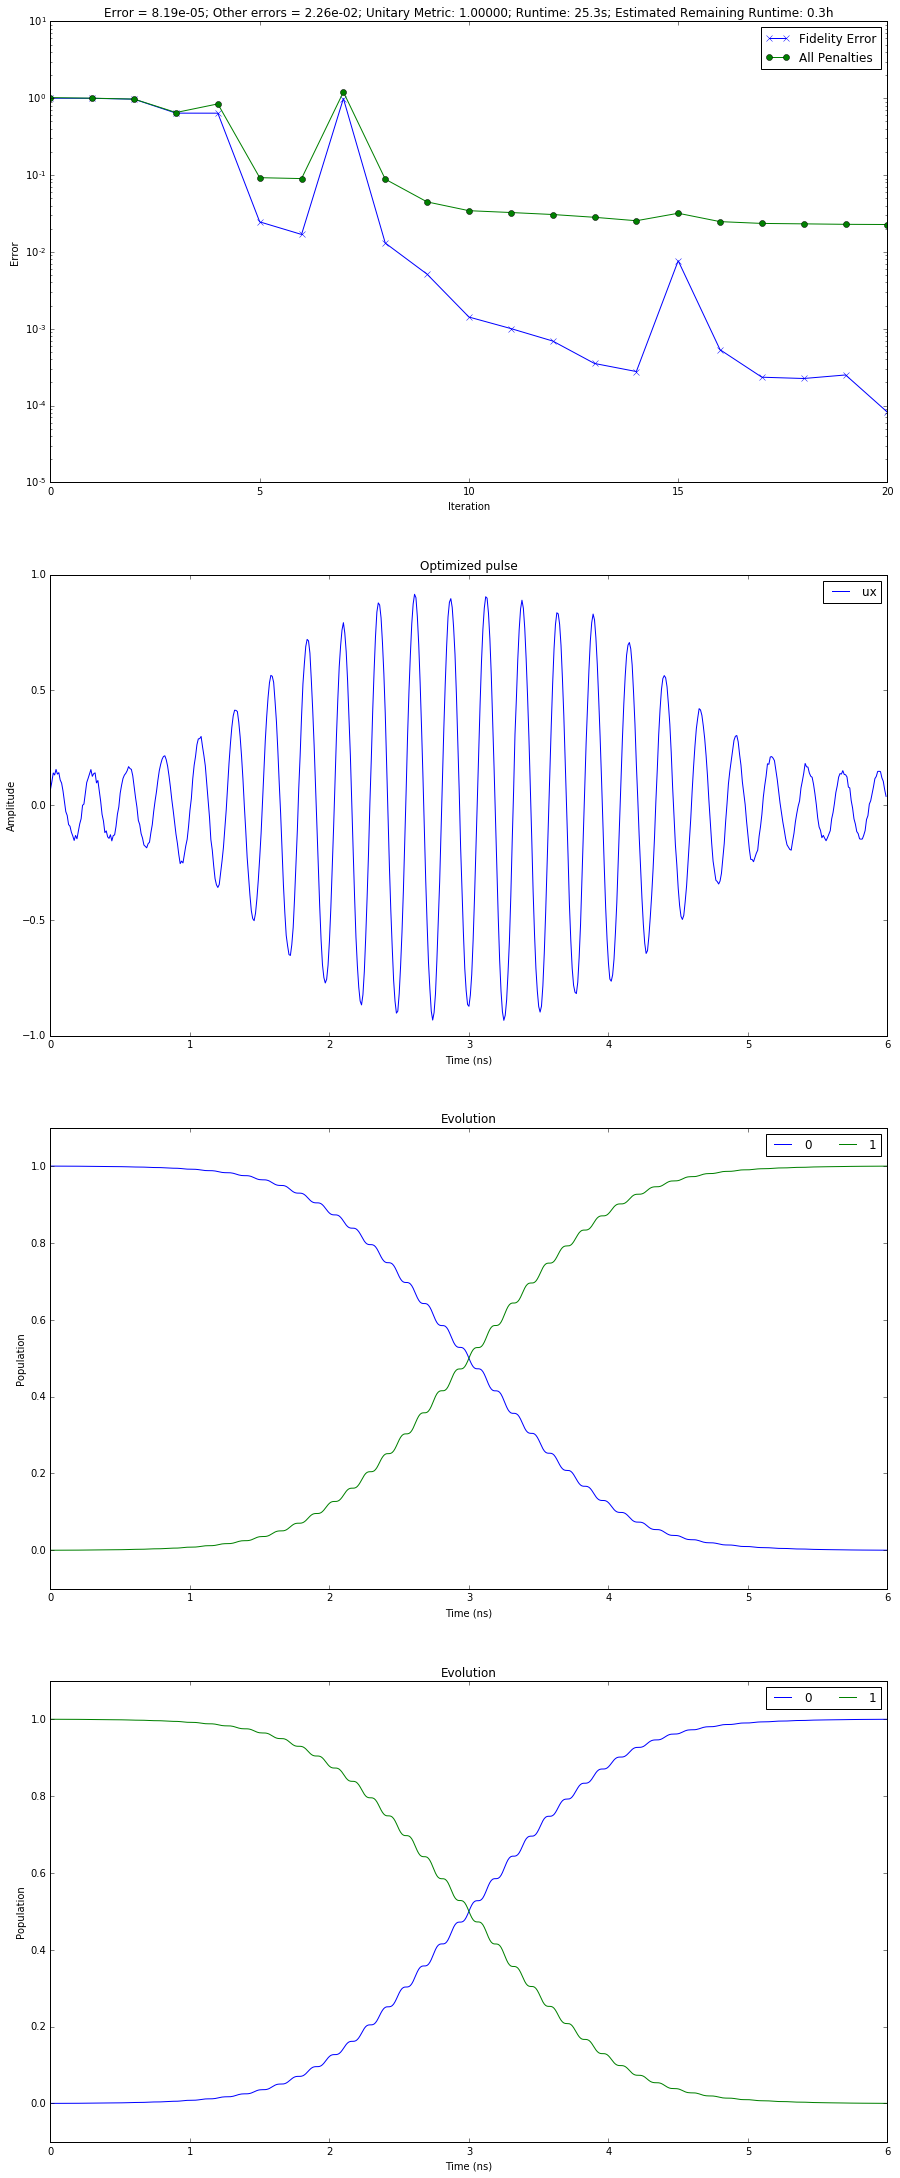

In [3]:
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],
                    state_transfer=True,use_gpu=False,sparse_H=False,
                    show_plots = True, 
       unitary_error = 1e-6, method = 'L-BFGS-B', maxA=ops_max_amp,Taylor_terms = [20,0] ,\
                   reg_coeffs=reg_coeffs, file_name='spin_pi_speed_up',
                    data_path = data_path)
      
      